$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Im}{\mathbf{I}}
  \newcommand{\Ym}{\mathbf{Y}}
$
### ITCS8010

# G_np Simulation Experiment

In this experiment I like to replicate the behaviour of `Fraction of node in largest CC` and `Fraction of isolated nodes` over the `p*log(n)` in `Erdös-Renyi random graph model`.

In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import collections as collec
%matplotlib inline

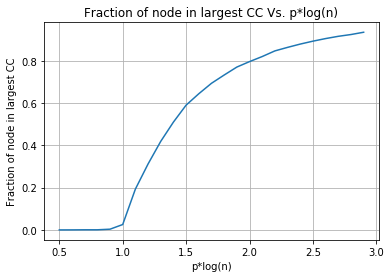

In [20]:
# Fraction of node in largest CC Vs. {p*log(n)}
n = 100000
x1 = []
y1 = []

for kave in np.arange(0.5, 3.0, 0.1):
    G = nx.fast_gnp_random_graph(n, kave / (n - 1))
    largest_cc = max(nx.connected_components(G), key=len)
    x1.append(kave)
    y1.append(len(largest_cc)/n)
    # print(kave)
    # print(len(largest_cc)/n)

fig, ax = plt.subplots()
ax.plot(x1, y1)

ax.set(xlabel='p*log(n)', ylabel='Fraction of node in largest CC',
       title='Fraction of node in largest CC Vs. p*log(n)')
ax.grid()

# fig.savefig("test.png")
plt.show()

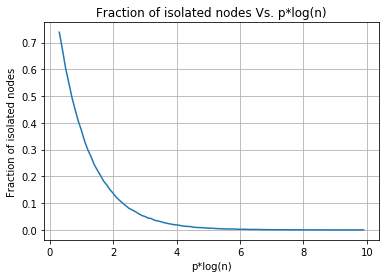

In [26]:
# Fraction of isolated nodes Vs. {p*log(n)}
x2 = []
y2 = []

for kave in np.arange(0.3, 10.0, 0.1):
    G = nx.fast_gnp_random_graph(n, kave / (n - 1))
    isolates = len(list(nx.isolates(G)))
    x2.append(kave)
    y2.append(isolates/n)
    # print(kave)
    # print(isolates/n)

fig, ax = plt.subplots()
ax.plot(x2, y2)

ax.set(xlabel='p*log(n)', ylabel='Fraction of isolated nodes',
       title='Fraction of isolated nodes Vs. p*log(n)')
ax.grid()

# fig.savefig("test.png")
plt.show()

## Key Network Properties

Now we like to use the networkx [[2]](https://networkx.github.io/documentation/stable/) library support to ovserve the values of the key network properties in Erdös-Renyi random graph.

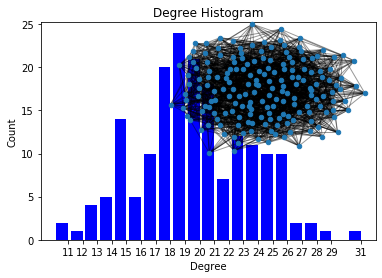

3
1.98032278088144


In [23]:
# plotting degree distribution

n1 = 180
p1 = 0.11

G = nx.fast_gnp_random_graph(n1, p1)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collec.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)
plt.show()

# diameter and path length
dia = nx.diameter(G)
print(dia)
avg_path_len = nx.average_shortest_path_length(G)
print(avg_path_len)

# References


[1] Erdős, Paul, and Alfréd Rényi. 1960. “On the Evolution of Random Graphs.” Bull. Inst. Internat. Statis. 38 (4): 343–47.

[2] NetworkX, “Software for Complex Networks,” https://networkx.github.io/documentation/stable/, 2020, accessed: 2020-10.